In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# import self-written modules
from IndModels.models import PosModel,NGModel,GAACModel
from Ensemble.model import Ensemble

In [3]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import modules
import numpy as np

np.random.seed(1511)

In [5]:
file = pickle.load(open('Data/TE_ML_Data_pickle.p','rb'))

In [6]:
from helper import parseEnzymeFile,modified_split

In [7]:
enzyme_filename = 'Data/Enzyme_Dataset.txt'

X,y,enz_names = parseEnzymeFile(enzyme_filename)

In [8]:
test_idx,train_idx = modified_split(enz_names)

# Position-Model

In [9]:
posModel = PosModel('Data/TE_ML_Data_pickle.p',enz_names,X,y,train_idx,test_idx,verboseQ=True,random_seed=1511,optimizeQ=False,probability=True)

-----Initial Model Evaluation-----
-----Training Accuracy:0.9259259259259259-----
-----Testing Accuracy:0.52-----


In [12]:
wrongidx = np.where(y[test_idx]!=posModel.SVMobject.ypredtest)[0]

In [62]:
wrteidx = test_idx[wrongidx]

In [63]:
wrteidx

array([ 10,  92, 103,  87,  48, 104,  96,   4,  16,  89,  60,  57])

In [67]:
EModel.preds[wrongidx]

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
wrteidx

array([2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2])

In [68]:
y[wrteidx]

array([2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2])

In [69]:
enz_names[wrteidx]

array(['Elaeis_guineensis', 'Cuphea_viscosisssima_(CvB2MT9',
       'Cuphea_viscosisssima_(CvB2MT28', 'Cuphea_viscosisssima_(CvB2MT26',
       'rTE24', 'Cuphea_viscosisssima_(CvB2MT21',
       'Cuphea_viscosisssima_(CvFatB2', 'Cocos_nucifera_(CnFatB1)',
       'Lindera_communis', 'Cuphea_viscosisssima_(CvB2MT1',
       'Cuphea_viscosisssima_(CvB2MT6)', 'rTE56'], dtype='<U34')

In [43]:
y[wrteidx]

array([2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2])

In [73]:
for i,ename,pred,actual in zip(wrteidx,enz_names[wrteidx],EModel.preds[wrongidx],y[wrteidx]):
    print(i,ename,pred,actual)

10 Elaeis_guineensis 1 2
92 Cuphea_viscosisssima_(CvB2MT9 2 1
103 Cuphea_viscosisssima_(CvB2MT28 1 2
87 Cuphea_viscosisssima_(CvB2MT26 2 3
48 rTE24 1 2
104 Cuphea_viscosisssima_(CvB2MT21 1 2
96 Cuphea_viscosisssima_(CvFatB2 1 3
4 Cocos_nucifera_(CnFatB1) 1 2
16 Lindera_communis 1 2
89 Cuphea_viscosisssima_(CvB2MT1 1 3
60 Cuphea_viscosisssima_(CvB2MT6) 1 3
57 rTE56 1 2


In [13]:
posModel.SVMobject.model.predict_proba(posModel.Xtest)[wrongidx,:]

array([[0.7259758 , 0.18126333, 0.09276087],
       [0.58925162, 0.22008977, 0.1906586 ],
       [0.5382761 , 0.26975342, 0.19197049],
       [0.09679943, 0.22719664, 0.67600393],
       [0.55290042, 0.15241821, 0.29468137],
       [0.5498186 , 0.25388908, 0.19629232],
       [0.71268882, 0.15275967, 0.13455151],
       [0.72787376, 0.17163673, 0.10048951],
       [0.71027722, 0.15730524, 0.13241754],
       [0.65429471, 0.18001546, 0.16568983],
       [0.16180529, 0.18863964, 0.64955508],
       [0.55290042, 0.15241821, 0.29468137]])

# NG only model

In [14]:
ngModel = NGModel(enz_names,X,y,train_idx,test_idx,k=7,s=1,verboseQ=True,random_seed=1511,optimizeQ=False,probability=True)

-----Initial Model Evaluation-----
-----Training Accuracy:0.9753086419753086-----
-----Testing Accuracy:0.52-----


In [82]:
np.unique(ngModel.SVMobject.ytest,return_counts=True)

(array([1, 2, 3]), array([ 8,  7, 10]))

In [76]:
ngModel.SVMobject.ytest

array([1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 1, 3,
       3, 1, 2])

In [74]:
ngModel.SVMobject.ypredtest

array([1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3,
       2, 1, 1])

In [85]:
def get_fp_tp(label,y,yhat):
    tot_tp = 0
    tp = 0
    tot_fp = 0
    fp=0
    for yi,yhati in zip(y,yhat):
        if yi==label:
            tot_tp+=1
            if yi==yhati: #true positive
                tp+=1
        if yhati==label:
            tot_fp+=1
            if yi!=label: #false positive
                fp+=1
    return tp/tot_tp,fp/tot_fp,tp,tot_tp,fp,tot_fp

In [88]:
get_fp_tp(2,ngModel.SVMobject.ytest,ngModel.SVMobject.ypredtest)

(0.14285714285714285, 0.75, 1, 7, 3, 4)

In [15]:
ngModel.SVMobject.model.predict_proba(ngModel.Xtest)[wrongidx,:]

array([[0.74738657, 0.09927336, 0.15334008],
       [0.59579294, 0.19343972, 0.21076733],
       [0.53026411, 0.23750756, 0.23222833],
       [0.07044636, 0.21229209, 0.71726155],
       [0.67288482, 0.1180279 , 0.20908727],
       [0.47328602, 0.21162842, 0.31508555],
       [0.56078069, 0.14880207, 0.29041724],
       [0.70461447, 0.10490968, 0.19047585],
       [0.52704107, 0.14405153, 0.3289074 ],
       [0.7492679 , 0.13548379, 0.1152483 ],
       [0.07201307, 0.16959822, 0.75838872],
       [0.65498431, 0.14049013, 0.20452556]])

# GAAC and NG model

In [17]:
gaacModel = GAACModel(enz_names,X,y,train_idx,test_idx,k=7,s=1,pca_components=40,verboseQ=True,random_seed=1511,optimizeQ=False,probability=True)

-----Initial Model Evaluation-----
-----Training Accuracy:0.9506172839506173-----
-----Testing Accuracy:0.56-----


In [18]:
gaacModel.SVMobject.model.predict_proba(gaacModel.Xtest)[wrongidx,:]

array([[0.79659455, 0.10307319, 0.10033226],
       [0.74480685, 0.17358309, 0.08161006],
       [0.31298503, 0.2651072 , 0.42190777],
       [0.01914521, 0.14782576, 0.83302903],
       [0.56036425, 0.12201333, 0.31762242],
       [0.31298503, 0.2651072 , 0.42190777],
       [0.78935207, 0.13907434, 0.07157359],
       [0.81013349, 0.09685879, 0.09300772],
       [0.76852901, 0.11733963, 0.11413136],
       [0.77076269, 0.14809162, 0.08114569],
       [0.21451744, 0.19691211, 0.58857045],
       [0.55590196, 0.18324655, 0.26085149]])

# Majority Vote Classifier

In [24]:
a = posModel.SVMobject.ypredtest

In [25]:
b = ngModel.SVMobject.ypredtest

In [26]:
c = gaacModel.SVMobject.ypredtest

In [32]:
p = EModel.preds

In [33]:
ac = y[test_idx]

In [44]:
for i,j,k,l,m in zip(a,b,c,p,ac):
    print(i,j,k,l,m)
    if l!=m:
        print('No')
        if i==j==k:

                print('Noooo')

1 1 1 1 1
1 1 1 1 2
No
Noooo
3 3 3 3 3
1 1 1 1 1
1 1 1 1 1
2 2 1 2 1
No
1 2 1 1 2
No
1 1 1 1 1
1 1 1 1 1
2 2 3 2 3
No
1 1 1 1 2
No
Noooo
3 3 3 3 3
1 1 1 1 2
No
Noooo
1 1 1 1 3
No
Noooo
3 3 3 3 3
1 1 1 1 2
No
Noooo
3 3 3 3 3
1 1 1 1 2
No
Noooo
1 1 1 1 3
No
Noooo
1 1 1 1 3
No
Noooo
1 1 1 1 1
3 3 3 3 3
3 2 2 2 3
No
1 1 1 1 1
1 1 1 1 2
No
Noooo


In [29]:
EModel = Ensemble([posModel.model,gaacModel.model,ngModel.model],
                  [posModel.Xtest,gaacModel.Xtest,ngModel.Xtest],y[test_idx])

In [30]:
EModel.preds

array([1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3,
       2, 1, 1])

In [31]:
EModel.acc

0.48

# Different random seeds

In [66]:
def multiprocess_func(randomseed):
    np.random.seed(randomseed)
    test_idx_i,train_idx_i = modified_split(enz_names,'Data/Enzyme-with-accession.txt')
    
    posModel_i = PosModel('Data/TE_ML_Data_pickle.p',enz_names,X,y,train_idx_i,test_idx_i)
    ngModel_i = NGModel(enz_names,X,y,train_idx_i,test_idx_i,inc_count=False)
    gaacModel_i = GAACModel(enz_names,X,y,train_idx_i,test_idx_i,inc_count=False)
    
    EModel_i = Ensemble([posModel_i.model,gaacModel_i.model,ngModel_i.model],
                  [posModel_i.Xtest,gaacModel_i.Xtest,ngModel_i.Xtest],y[test_idx_i])
    
    return posModel_i.SVMobject.acc_test,ngModel_i.SVMobject.acc_test,gaacModel_i.SVMobject.acc_test,EModel_i.acc
    
    
    
    

In [67]:
import multiprocessing as mp
print(mp.cpu_count())
pool = mp.Pool(mp.cpu_count())

24


In [68]:
%%time
accs = list(pool.map(multiprocess_func,[i for i in range(10000)]))

CPU times: user 93 ms, sys: 26 ms, total: 119 ms
Wall time: 56.7 s


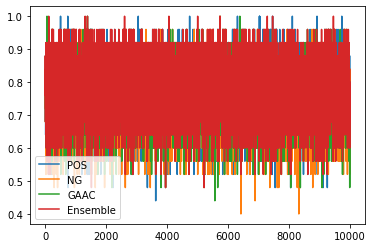

In [69]:
plt.plot(range(len(accs)),accs)
plt.legend(['POS','NG','GAAC','Ensemble'])

In [70]:
pos_preds = [a[0] for a in accs]
ng_preds = [a[1] for a in accs]
gaac_preds = [a[2] for a in accs]
ensemble_preds = [a[3] for a in accs]

In [71]:
min(pos_preds),np.mean(pos_preds),np.std(pos_preds)

(0.44, 0.77074, 0.08057997517994156)

In [72]:
min(ng_preds),np.mean(ng_preds),np.std(ng_preds)

(0.4, 0.746708, 0.08383485394512237)

In [73]:
min(gaac_preds),np.mean(gaac_preds),np.std(gaac_preds)

(0.44, 0.769392, 0.07932383208090744)

In [74]:
min(ensemble_preds),np.mean(ensemble_preds),np.std(ensemble_preds)

(0.48, 0.783752, 0.07861400954028487)

In [55]:
minidx = np.argmin(ensemble_preds)

minidx, ensemble_preds[minidx]

Save bad result indices

In [24]:
with open('Data/BadResultsIdx.txt','w') as f:
    for idx,acc in enumerate(ensemble_preds):
        if acc<0.6:
            f.write(str(idx))
            f.write('\n')

In [25]:
np.argmin(ensemble_preds)

1511

In [26]:
len(np.where(np.array(ensemble_preds)<0.6)[0])

92

In [27]:
np.histogram(ensemble_preds)

(array([  19,   73,  200, 1234, 1347, 1850, 3694,  997,  462,  124]),
 array([0.48 , 0.532, 0.584, 0.636, 0.688, 0.74 , 0.792, 0.844, 0.896,
        0.948, 1.   ]))

In [28]:
def save_results(filename,mylist):
    with open(f'Reports/Results/{filename}','w') as f:
        for line in mylist:
            f.write(str(line))
            f.write('\n')
    return 

def save_figure(figurename,mylist):
    plt.figure()
    values = plt.hist(mylist,bins=5);
    b=values[1]
    plt.xlabel('Accuracy bin');
    plt.ylabel('Count');
    plt.xticks(b)
    plt.title(f'{figurename} Test Accuracy Histogram');
    plt.savefig(f"Reports/Results/{'-'.join(figurename.split(' '))}.png");
    return

In [29]:
# save_results('Positional-Model.txt',pos_preds),save_results('k-mer-Model.txt',ng_preds),save_results('GAA-kmer-Model.txt',gaac_preds),save_results('Ensemble-Model.txt',ensemble_preds)

In [30]:
# save_figure('Positional Feature Model',pos_preds),save_figure('kmer Motif Model',ng_preds),save_figure('GAA Motif Model',gaac_preds),save_figure('Ensemble Model',ensemble_preds)